### importing libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

### Importing dataset

In [3]:
url = "http://bit.ly/w-data"
data = pd.read_csv(url)

### Exploratory Data Analysis

In [4]:
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [6]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


Text(0, 0.5, 'Scores')

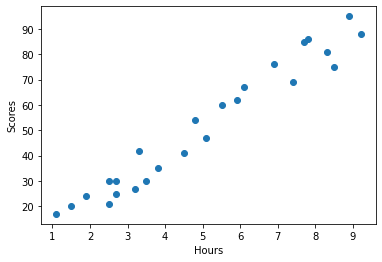

In [11]:
plt.scatter(data["Hours"],data["Scores"])
plt.xlabel("Hours")
plt.ylabel("Scores")

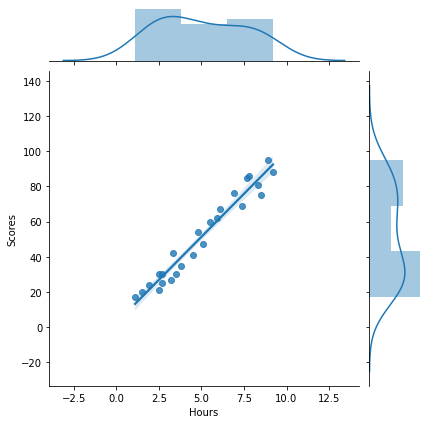

In [18]:
sns.jointplot(data=data,x='Hours', y='Scores',kind='reg')

### Preparing and training data

In [23]:
from sklearn.model_selection import train_test_split

x=data['Hours']
x = x.values.reshape(-1,1)
y=data['Scores']  

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42) 

In [24]:
from sklearn.linear_model import LinearRegression  
reg = LinearRegression()  
reg.fit(X_train, y_train) 

LinearRegression()

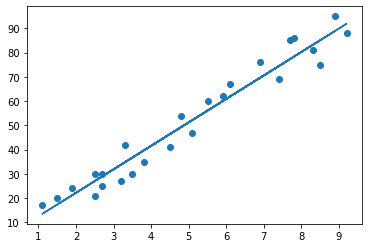

In [29]:
Reg_line = reg.coef_*x+reg.intercept_

# Plotting for the test data
plt.scatter(x,y)
plt.plot(x, Reg_line);
plt.show()

### Predicting Values

In [30]:
pred =reg.predict(X_test)

In [31]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': pred})  
df 

,Actual,Predicted
8,81,83.188141
16,30,27.032088
0,21,27.032088
23,76,69.633232
11,62,59.951153


In [57]:
# What will be predicted score if a student studies for 9.25 hrs/ day?
hour=9.25
score=reg.predict(np.array([hour]).reshape(1, 1))

print("Predicted Score = {}".format(score[0])," for a student studying 9.25 hrs/day.")

Predicted Score = 92.38611528261494  for a student studying 9.25 hrs/day.


In [58]:
print("Accuracy for the percentage of an student based on the no. of study hours. ".format(reg.score(X_test, y_test)))

0.9678055545167994
